## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('students-data.csv', delimiter=';')
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [3]:
for i in df.columns:
    print(i,'=',pd.unique(df[i]))

school = ['GP' 'MS']
sex = ['F' 'M']
age = [18 17 15 16 19 22 20 21]
address = ['U' 'R']
famsize = ['GT3' 'LE3']
Pstatus = ['A' 'T']
Medu = [4 1 3 2 0]
Fedu = [4 1 2 3 0]
Mjob = ['at_home' 'health' 'other' 'services' 'teacher']
Fjob = ['teacher' 'other' 'services' 'health' 'at_home']
reason = ['course' 'other' 'home' 'reputation']
guardian = ['mother' 'father' 'other']
traveltime = [2 1 3 4]
studytime = [2 3 1 4]
failures = [0 3 2 1]
schoolsup = ['yes' 'no']
famsup = ['no' 'yes']
paid = ['no' 'yes']
activities = ['no' 'yes']
nursery = ['yes' 'no']
higher = ['yes' 'no']
internet = ['no' 'yes']
romantic = ['no' 'yes']
famrel = [4 5 3 1 2]
freetime = [3 2 4 1 5]
goout = [4 3 2 1 5]
Dalc = [1 2 5 3 4]
Walc = [1 3 2 4 5]
health = [3 5 1 2 4]
absences = [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
G1 = [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2 = [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G3 = [ 6 10 15 11 19 

In [4]:
#no presence of any special characters

In [5]:
df.shape

(395, 33)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [8]:
df.rename_axis(['number'],axis='columns').head()

number,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [10]:
# There are no missing values, neither there are any special characters in the data set.

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [11]:
df.select_dtypes(include='object', exclude='int64').head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other
reason,course,course,other,home,home
guardian,mother,father,mother,mother,father
schoolsup,yes,no,yes,no,no


In [12]:
df.select_dtypes(include='int64', exclude='object').head().T

,0,1,2,3,4
age,18,17,15,15,16
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
traveltime,2,1,1,1,1
studytime,2,2,2,3,2
failures,0,0,3,0,0
famrel,4,5,4,3,4
freetime,3,3,3,2,3
goout,4,3,2,2,2
Dalc,1,1,2,1,1


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [13]:
df.var()


age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [14]:
drop=[]
for i in df.select_dtypes(include='int64', exclude='object'):
    if df[i].var()<1:
        drop.append(i)
print(drop)
df.drop(drop,axis=1,inplace=True)

['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc']


In [15]:
df.shape

(395, 27)

In [16]:
df.var()

age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
dtype: float64

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encode=df.select_dtypes(include='object', exclude='int64').columns

In [19]:
number=LabelEncoder()
for i in encode:
    df[i]= number.fit_transform(df[i].astype('str'))
df.head().T

,0,1,2,3,4
school,0,0,0,0,0
sex,0,0,0,0,0
age,18,17,15,15,16
address,1,1,1,1,1
famsize,0,0,1,0,0
Pstatus,0,1,1,1,1
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,0,0,0,1,2
Fjob,4,2,2,3,2


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [20]:
G1=pd.DataFrame(np.where(df['G1'] >= 10, 1, 0), columns=['G1']).astype('str')
G2=pd.DataFrame(np.where(df['G2'] >= 10, 1, 0), columns=['G2']).astype('str')
G3=pd.DataFrame(np.where(df['G3'] >= 10, 1, 0), columns=['G3']).astype('str')

In [21]:
df['G1'] = G1
df['G2'] = G2
df['G3'] = G3

In [22]:
df = df.astype(int)

In [23]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [24]:
y=df['G3']
X = df.drop('G3',axis=1)

In [25]:
print(X.shape)
print(y.shape)
print(X.head().T)
print(y.head())

(395, 26)
(395,)
             0   1   2   3   4
school       0   0   0   0   0
sex          0   0   0   0   0
age         18  17  15  15  16
address      1   1   1   1   1
famsize      0   0   1   0   0
Pstatus      0   1   1   1   1
Medu         4   1   1   4   3
Fedu         4   1   1   2   3
Mjob         0   0   0   1   2
Fjob         4   2   2   3   2
reason       0   0   2   1   1
guardian     1   0   1   1   0
schoolsup    1   0   1   0   0
famsup       0   1   0   1   1
paid         0   0   1   1   1
activities   0   0   0   1   0
nursery      1   0   1   1   1
higher       1   1   1   1   1
internet     0   1   1   1   0
romantic     0   0   0   1   0
goout        4   3   2   2   2
Walc         1   1   3   1   2
health       3   3   3   5   5
absences     6   4  10   2   4
G1           0   0   0   1   0
G2           0   0   0   1   1
0    0
1    0
2    1
3    1
4    1
Name: G3, dtype: int32


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [27]:
ddf = pd.read_csv('students-data.csv', delimiter=';')

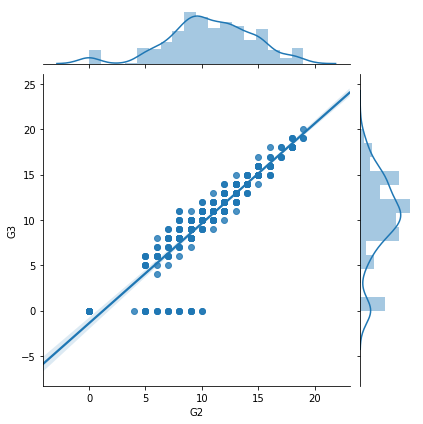

In [28]:
sns.jointplot(ddf.G2,ddf.G3,data=ddf,kind='reg')

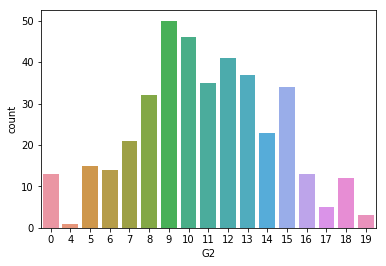

In [29]:
sns.countplot(ddf.G2)

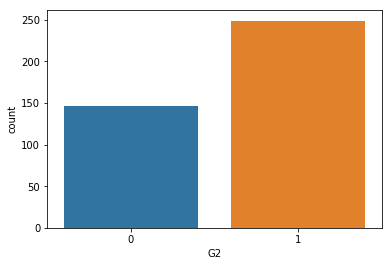

In [30]:
sns.countplot(df.G2)

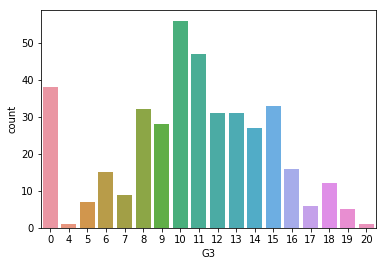

In [31]:
sns.countplot(ddf.G3)

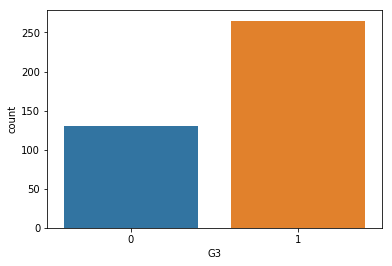

In [32]:
sns.countplot(df.G3)

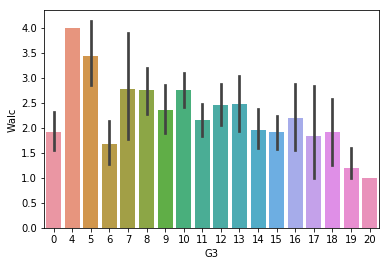

In [33]:
sns.barplot(ddf.G3,ddf.Walc,data=ddf)

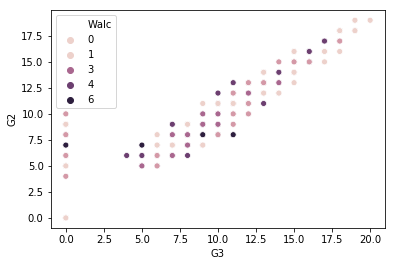

In [34]:
sns.scatterplot(ddf.G3,ddf.G2,data=ddf,hue='Walc')

# INSIGHTS

In [35]:
print(ddf.G2.corr(ddf.G3))
# The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.
# There is also a high correlation between G2 abd G3.

0.9048679892693011


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

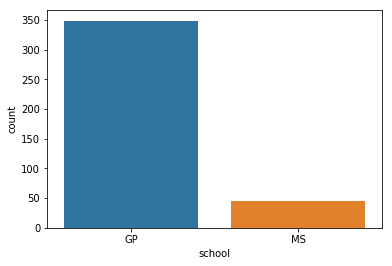

In [36]:
sns.countplot(ddf.school)

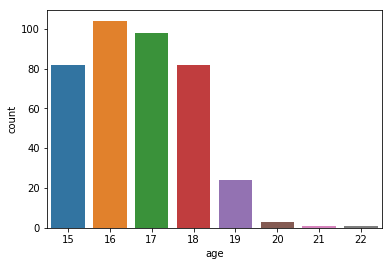

In [37]:
sns.countplot(ddf.age)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.24 , random_state=7)

In [39]:
print(X_train.shape)
print(y_train.shape)

(300, 26)
(300,)


In [40]:
print(X_test.shape)
print(y_test.shape)

(95, 26)
(95,)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


In [42]:
final = LogisticRegression()
final.fit(X_train,y_train)
predicted = final.predict(X_test)
print(confusion_matrix(y_test,predicted))
print('Accuracy',accuracy_score(y_test, predicted))
print('Train Accuracy',final.score(X_train,y_train))
print('Test Accuracy',final.score(X_test,y_test))

print('f1',f1_score(y_test, predicted,average='macro'))
print('*******Classification Report********\n',classification_report(y_test,predicted))


[[23  2]
 [ 2 68]]
Accuracy 0.9578947368421052
Train Accuracy 0.9066666666666666
Test Accuracy 0.9578947368421052
f1 0.9457142857142857
*******Classification Report********
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        25
           1       0.97      0.97      0.97        70

   micro avg       0.96      0.96      0.96        95
   macro avg       0.95      0.95      0.95        95
weighted avg       0.96      0.96      0.96        95



### INSIGHTS

1. Logistic Regression is a linear algorithm used for predicting weather the student will pass or fail.
2. The accuracy we see is 0.95 or 95% for a random state of 7 where the data is split in a ratio of 76:24.
3. The confusion matrix provides an indication of the four errors made. 2 each for false negative and false positive.
4. Finally, the classification report provides a breakdown of each class/Grades by precision, recall, f1-score and support which show high accuracy

# Naive bayes with Iris data

### Import Iris.csv

In [43]:
iris=pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
iris.set_index('Id',inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 1 to 152
Data columns (total 5 columns):
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), object(1)
memory usage: 7.1+ KB


In [46]:
for i in iris.columns:
    print(i,'=',pd.unique(iris[i]))

SepalLengthCm = [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9 nan]
SepalWidthCm = [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6 nan]
PetalLengthCm = [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2 nan]
PetalWidthCm = [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3 nan]
Species = ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [47]:
iris.isnull().sum()

SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

### There are presence of null values

In [48]:
for i in iris.columns:
    print(iris.loc[iris[i].isnull()])

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
152            NaN           NaN            NaN           1.8  Iris-virginica
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
151            5.9           NaN            NaN           NaN  Iris-virginica
152            NaN           NaN            NaN           1.8  Iris-virginica
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
151            5.9           NaN            NaN           NaN  Iris-virginica
152            NaN           NaN            NaN           1.8  Iris-virginica
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                              

In [49]:
# Either we can drop all the rows containing Nan values
iris.dropna(inplace=True)

'''OR
#replace the nan values with median of the column
iris['SepalLengthCm'].fillna(iris['SepalLengthCm'].median(),inplace=True)
iris['SepalWidthCm'].fillna(value=iris['SepalWidthCm'].median(),inplace=True)
iris['PetalLengthCm'].fillna(value=iris['PetalLengthCm'].median(),inplace=True)
iris['PetalWidthCm'].fillna(value=iris['PetalWidthCm'].median(),inplace=True)'''

"OR\n#replace the nan values with median of the column\niris['SepalLengthCm'].fillna(iris['SepalLengthCm'].median(),inplace=True)\niris['SepalWidthCm'].fillna(value=iris['SepalWidthCm'].median(),inplace=True)\niris['PetalLengthCm'].fillna(value=iris['PetalLengthCm'].median(),inplace=True)\niris['PetalWidthCm'].fillna(value=iris['PetalWidthCm'].median(),inplace=True)"

In [50]:
print(iris.isnull().sum())
print(iris.info())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [51]:
iris['Species']= number.fit_transform(iris['Species'].astype('str'))
print(iris['Species'].value_counts())
print(iris.head())

2    50
1    50
0    50
Name: Species, dtype: int64
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
Id                                                                   
1             5.1           3.5            1.4           0.2        0
2             4.9           3.0            1.4           0.2        0
3             4.7           3.2            1.3           0.2        0
4             4.6           3.1            1.5           0.2        0
5             5.0           3.6            1.4           0.2        0


In [52]:
y=iris['Species']
X = iris.drop('Species',axis=1)

In [53]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [54]:
print(iris.mean())
print('\n')
print(iris.var())

SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
Species          1.000000
dtype: float64


SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
Species          0.671141
dtype: float64


### Find the distribution of target variable (Class)

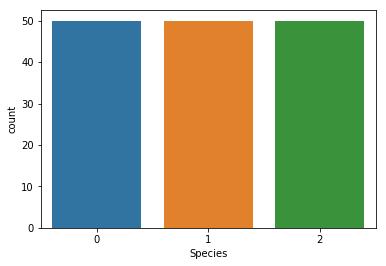

In [55]:
# The target variable is Species
sns.countplot(iris.Species)

### Plot the distribution of target variable using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB71EC8F98>]],
      dtype=object)

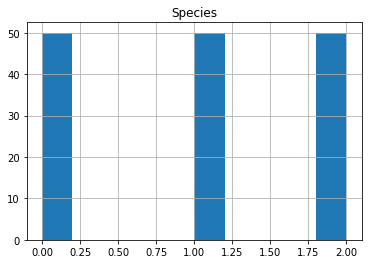

In [56]:
iris.hist('Species')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB71F58630>,
      dtype=object)

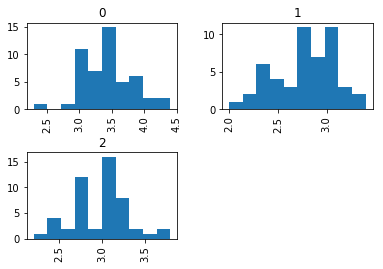

In [57]:
iris.hist(column='SepalWidthCm', by='Species')

[]

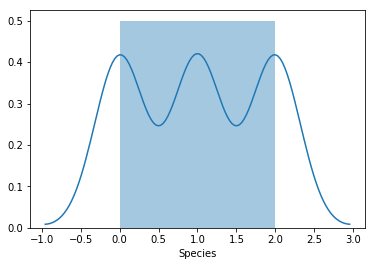

In [58]:
sns.distplot(iris["Species"]).plot(kind="bar")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB730EB0B8>,
      dtype=object)

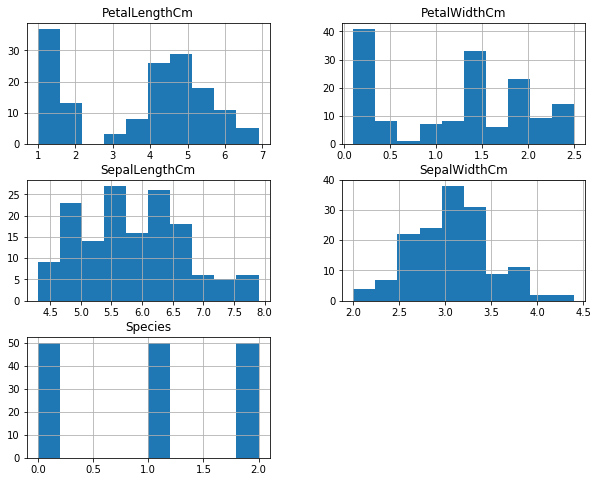

In [59]:
iris.hist(figsize=(10,8))

SepalLengthCm       AxesSubplot(0.125,0.657941;0.227941x0.222059)
SepalWidthCm     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
PetalLengthCm    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
PetalWidthCm        AxesSubplot(0.125,0.391471;0.227941x0.222059)
Species          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

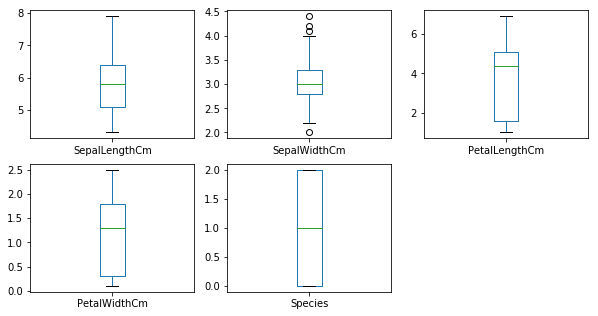

In [60]:
iris.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB738C7898>,
      dtype=object)

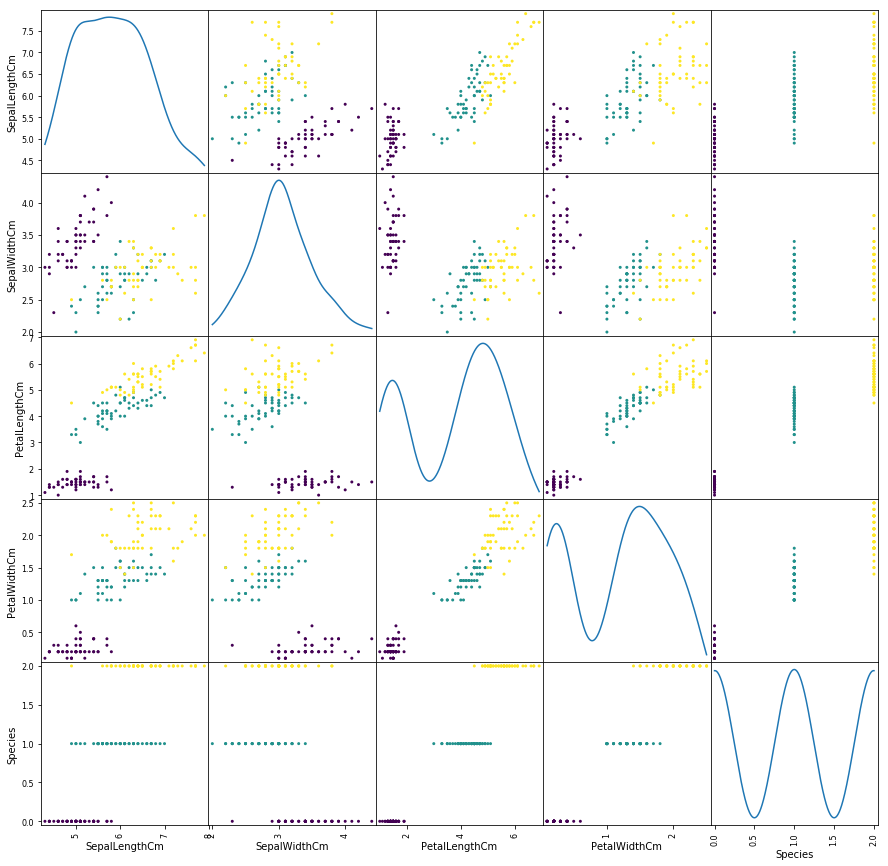

In [61]:
pd.plotting.scatter_matrix(iris, alpha=1,figsize=(15, 15),diagonal='kde',c=iris['Species'])
#pd.plotting.scatter_matrix(iris, c=iris['Species'], alpha=1, figsize = [8,8],s=80, marker = 'D')

### INSIGHTS

1. Observed that spread of attributes is quite different. Attributes PetalLength and PetalWidth appear 
to be quite skewed towards larger values.
2. Attributes  SepalLength and SepalWidth are found to be normally distributed.
3. SepalWidth has a uneven spread of the data points and have a weak relation with the other features
4. This is a very insightful scatterplot. The plot PetalLengthCm vs PetalWidthCm can be distinguished and are very good features for building a model
5. Here in the plot SepalLengthCm vs PetalLengthCm, the classes can be distinguished and there is good clustering of dependent variable.
6. For the plots including SepalWidthcm, the Species Iris-setosa show distinct clusters but is difficult to distinguish other classes/species

### Summary Statistics and explain insights for at least 2 variables

In [62]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
Species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


### INSIGHTS

SepalLengthCm- 
1. Have a total number of 152 observations
2. Mean of all the values in the observation is 5.843421
3. IQR where the middle value in given set of numbers is 5.80 and Q1( the "middle" value in the first half of the ordered data set) is 5.1 and Q2(is the "middle" value in the second half of the ordered data set) is 6.4
4. As the mean and the median are almost of same value, we can say the data is normally distributed.We can use the mean to describe the center
5. Minimum value is 4.3 and max value is 7.9
6. Standard Deviation is 0.822
### If you are using the mean to describe the center then we use the standard deviation to describe the spread but if we are using the median to describe the center(eg.Petal Length) then we use the IQR to describe the spread. 

SepalWidthCm- 
1. Have a total number of 152 observations
2. Mean of all the values in the observation is 3.05
3. IQR where the middle value in given set of numbers is 3 and Q1( the "middle" value in the first half of the ordered data set) is 2.8 and Q2(is the "middle" value in the second half of the ordered data set) is 3.3
4. As the mean and the median are almost of same value, we can say the data is normally distributed.
5. Standard Deviation is 0.430
6. Minimum value is 2 and max value is 4.4

### Correlation among all variables and give your insights

In [63]:
iris.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.0,-0.11,0.87,0.82,0.78
SepalWidthCm,-0.11,1.0,-0.42,-0.36,-0.42
PetalLengthCm,0.87,-0.42,1.0,0.96,0.95
PetalWidthCm,0.82,-0.36,0.96,1.0,0.96
Species,0.78,-0.42,0.95,0.96,1.0


### INSIGHTS

1. there is a high positive correlation between PetalWidth and PetalLength (0.96)
2. there is a high positive correlation between PetalLength and SepalLength (0.87)
3. there is a high positive correlation between PetalWidth and SepalLength (0.82)

while
4. PetalLength and PetalWidth have a high positive correlation with Species[Target Variable]
5. SepalLength has a moderate positive correlation with Species

And
6. SepalWidth has a weak negative correlation with all features and is a weak feature in Prediction

#### Hence,we can say that the features PetalWidth, SepalLength and PetalLength are good features for building and predicting models

### Split data in Training and Validation in 80:20

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state =3)

### Do Feature Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)

### Train and Fit NaiveBayes Model

In [66]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(scaledX_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(scaledX_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [67]:
print(confusion_matrix(y_test,y_pred))
print('Accuracy',accuracy_score(y_test, y_pred))
print('Train Accuracy',gnb.score(scaledX_train,y_train))
print('Test Accuracy',gnb.score(scaledX_test,y_test))

print('f1',f1_score(y_test, y_pred,average='macro'))
print('*******Classification Report********\n',classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Accuracy 0.9666666666666667
Train Accuracy 0.95
Test Accuracy 0.9666666666666667
f1 0.9665831244778613
*******Classification Report********
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### INSIGHTS

1. Naive Bayes is a non linear algorithm used for predicting the Species of the iris flower.
2. The accuracy we see is 0.967 or 96% for a random state of 3 where the data is split in a ratio of 80:20 and hence can classify the species successfully.Here the accuracy define how often is the classifier correct.
3. The confusion matrix provides an indication of the one error made.
4. Finally, the classification report provides a breakdown of each class/Species by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).

#### We getting 100% accuracy for random states 15.